<a href="https://colab.research.google.com/github/michelgoncalves/projects/blob/master/MAG_%5BRedo%5DDetec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito
Michel Antônio Gonçalves - https://linkedin.com/in/michel-antonio-goncalves

&nbsp;


<img src="https://miro.medium.com/max/900/1*FX1e5NRetKentjpga4MLIg.jpeg" width="90%"/>

[Fonte da imagem](https://miro.medium.com/max/900/1*FX1e5NRetKentjpga4MLIg.jpeg)

## Em 2018, 24,26 bilhões de dólares foram perdidos globalmente devido à fraudes de cartões de crédito - um aumento de 18,4% em relação ao período anterior. A tendência é que esse crescimento se intensifique.  

[Fonte: Shift Credit Card Processing](https://shiftprocessing.com/credit-card-fraud-statistics/)

Considerada a maneira número 1 de furto de identidade no mundo, a fraude via cartão de crédito é um problema crônico em escala global.  

As inovações tecnológicas oferecem crescentes facilidades para o consumidor, tais como o e-commerce, pagamentos digitais, bem como uma infinidade de apps de serviços que usam do cartão de crédito como forma primária de pagamento. Na mesma via, contudo, inovam-se também os meios que terceiros utilizam para clonar cartões de crédito e realizar uma série de compras indevidas sob a identidade da vítima. O resultado: estresse por parte do consumidor e prejuízos crescentes para as instituições financeiras que, ao ressarcir o cliente lesado, fica com o prejuízo oriundo da fraude, prejuízo que, se analisado em escala global, acumula-se na casa dos bilhões.



## Somente no Brasil, os prejuízos com fraudes de cartão de crédito totalizaram aproximadamente R$1,8 bilhão. Afetando em torno de 12,1 milhões de pessoas no país.
[Fonte: Época Negócios](https://epocanegocios.globo.com/Brasil/noticia/2019/08/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-r-18-bilhao-em-12-meses.html) 

Considerando a gravidade desse problema na sociedade mundial, muitos são os esforços das áreas financeira, de segurança e, principalmente, de tecnologia para a criação de soluções focadas em minimizar as fraudes de cartão de crédito. Por trás dessas soluções inovadoras, trabalham modelos de inteligência artificial cada vez mais sofisticados, capazes de agir de forma preventiva para mapear os padrões das compras fraudulentas, identificá-las e interrompê-las em tempo hábil. 


---
---


# **1 - Objetivo deste projeto**

#### Buscando contribuir no combate às fraudes bancárias e minimizar prejuízos das instituições financeiras, esse projeto utilizará de técnicas de *Data Science*, em cima de uma base de dados bancária real, para construir um modelo de *machine learning* que seja eficiente na: 

<p>&nbsp</p>

* Análise dos diferentes padrões de compra e transação bancária para aperfeiçoar o desempenho na detecção de transações fraudulentas, possibilitando a interrupção mais rápida das atividades ilegais, minimizando o estresse do consumidor e reduzindo os prejuízos das instituições financeiras;

* Minimização da ocorrência de "falsos positivos": onde uma compra legítima pelo cartão é qualificada como fraudulenta, ocasionando o bloqueio da operação financeira (ou mesmo do cartão), provocando transtorno e constrangimento ao consumidor. 

<p>&nbsp</p>

#### Todos os passos e técnicas aqui utilizados foram devidamente contextualizados para facilitar a compreensão e auxiliar no aprendizado de estudantes e interessados na área de *Data Science*.

---
---

# **2 - Origem dos dados**

A base de dados aqui utilizada foi coletada, analisada e montada pelo trabalho conjunto da *Worldline* e o *Machine Learning Group* da ULB (*Université Libre de Bruxelles*)

Os dados foram disponibilizados por algumas empresas européias de cartão de crédito. 

O *dataset* (base de dados) contém operações financeiras realizadas por usuários europeus de cartão de crédito, abrangendo transações ocorridas durante 2 dias do mês de setembro do ano de 2013. 

**Nessa base, das quase 290 mil transações, 492 foram classificadas como fraudes.** 


<img src="https://4brf13430svm3bnu053zbxvg-wpengine.netdna-ssl.com/wp-content/uploads/2016/03/Credit-Card-Fraud.jpg" width="70%"/>

[Fonte  da imagem](https://4brf13430svm3bnu053zbxvg-wpengine.netdna-ssl.com/wp-content/uploads/2016/03/Credit-Card-Fraud.jpg)


---
---

#**3 - Importando os dados e bibliotecas necessárias**

Inicialmente, serão importadas as bibliotecas *Python* necessárias para o desenvolvimento da análise exploratória. Em seguida, o arquivo `csv` será importado para uma estrutura de *DataFrame* (df) a ser manipulada pela biblioteca `pandas`. Já as bibliotecas `matplotlib` e `seaborn` serão utilizadas para geração de gráficos referentes à base de dados.

In [1]:
# importar os pacotes necessários para análise exploratória

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para construir o modelo para prevenção de fraudes e avaliar seu desempenho, serão importadas também as bibliotecas de *Machine Learning* necessárias.

In [2]:
#Instalação e importação da biblioteca para visualização em Machine Learning 
!pip install -q scikit-plot

import scikitplot as skplt

#para separar os dados entre treino e teste
from sklearn.model_selection import train_test_split 

#para padronizar os dados para regressão logística
from sklearn.preprocessing import StandardScaler 

# UnderSampler para o balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler

#relatório de performance do modelo
from sklearn.metrics import classification_report 

#matriz de confusão para auxiliar a avaliação
from sklearn.metrics import confusion_matrix 

#modelos de scoring
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# modelo do sklearn de Regressão Logística
from sklearn.linear_model import LogisticRegression

# modelo do sklearn de Árvore de Decisão   
from sklearn.tree import DecisionTreeClassifier



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Importando a base de dados e a instanciando em um *Data Frame* **(df)**

In [3]:
# importar os dados para um dataframe

file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

---
---

# **4 - Análise Exploratória do *dataset***

Com os dados importados para dentro de uma estrutura *Dataframe* (df), iniciaremos a **análise exploratória dos dados**, buscando detectar irregularidades e realizar os ajustes necessários para que o modelo de *Machine Learning* seja posteriormente desenvolvido de maneira otimizada. 

## 4.1 - Tamanho da base de dados


In [4]:
df.shape

(284807, 31)

In [5]:
#Número de entradas(linhas) e variáveis (colunas) do dataset

print('Número de entradas:\t{}'.format(df.shape[0]))
print('Número de variáves:\t{}'.format(df.shape[1]))

Número de entradas:	284807
Número de variáves:	31


In [6]:
#5 primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#5 últimas entradas do dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
#Identificação de todas as variáveis (colunas) do DataFrame
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#Categoria dos dados de cada variável (coluna)
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## 4.2 - Identificação e descrição das variáveis (colunas) que compõem o *dataset* 

* `Time` - Representa (em segundos) o tempo passado entre cada transação financeira em relação a primeira transação do *dataset*.

* `Amount` - Representa a quantia monetária envolvida em cada transação. 

* `Class` - **É a nossa variável-alvo**, pois classifica as transações financeiras entre: 
  * **0**: Se a transação for normal 
  * **1**: Se a transação for fraudulenta

* `V1`, `V2`, `V3`, `V4` até `V28` - Representam as demais 28 variáveis numéricas do *dataset*. Todas elas foram descaracterizadas com o objetivo de proteger a privacidade e segurança dos dados originais. Essas variáveis passaram pelo procedimento PCA (*Principal Component Analysis*) - que estabelece relações em um grande conjunto de variáveis, reduzindo a um grupo menor (no caso, essas 28) para otimizar a análise sem que haja perda significativa de informação.

## 4.3 - Correlação entre as variáveis (colunas) do *dataset* 

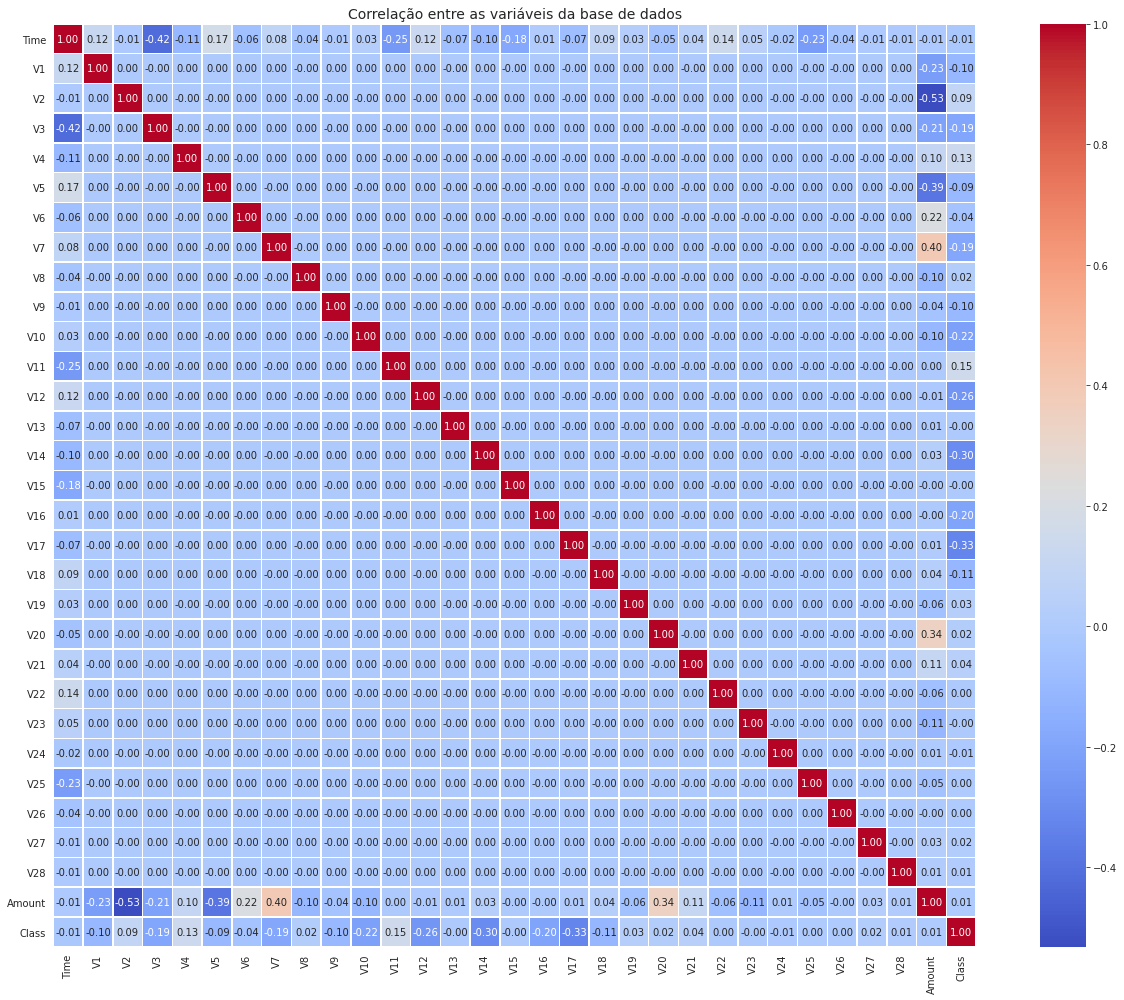

In [12]:
# Matriz de correlação 

corr = df.corr()

fig, ax=plt.subplots(figsize=(18,14))

sns.heatmap(corr, ax=ax, cmap='coolwarm', square=True, annot=True, fmt='.2f', linecolor='white', linewidths=.5)
ax.set_title('Correlação entre as variáveis da base de dados', fontsize=14)
plt.tight_layout()

> O dataset **não apresenta correlações consideradas fortes**, ou seja, **superiores a 0.7** no caso das correlações positivas e **inferiores a -0.7** no caso das correlações negativas.  


## 4.4 - Verificação da presença de valores ausentes 

**Valores ausentes podem afetar a precisão de certas análises realizadas em uma base de dados.** Sendo assim, utilizaremos a biblioteca *pandas* para identificar a quantidade de valores ausentes presentes nas entradas (linhas) e variáveis (colunas) do *dataset*, facilitando o processo de limpeza de dados, bem como a eficiência de futuras análises. 

In [13]:
# Conferência de valores ausentes
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

In [14]:
print('Total de valores ausentes do dataset:\t{}'.format(df.isnull().sum().max()))

Total de valores ausentes do dataset:	0


> A soma dos valores ausentes para cada uma das variáveis (colunas) é igual a zero. Ou seja, **a base de dados está completa**.

## 4.5 - Verificação de valores desbalanceados 

O *dataset* abrange operações financeiras que aconteceram dentro do período de dois dias, onde foram classificadas **492 fraudes** em meio a quase **290 mil transações**. Ou seja, há uma expressiva discrepância entre o número de transações legítimas e transações fraudulentas.

Para confirmar a presença desse desbalanceamento, analisaremos a variável-alvo `Class` e plotaremos, em um gráfico de barras, as entradas para cada uma de suas categorias, sendo **0** para as transações **legítimas** e **1** para classificar **fraudes**.  

In [15]:
df.shape[0]

284807

In [16]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

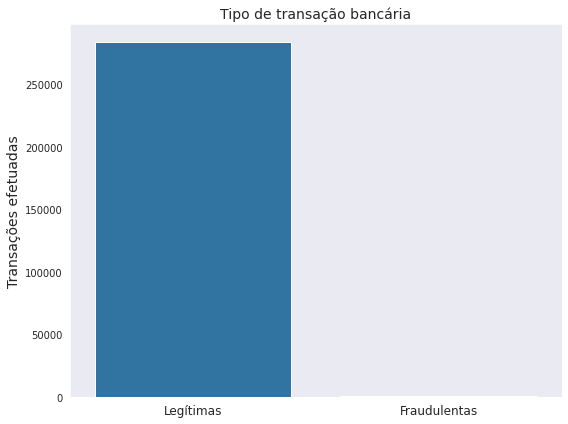

In [19]:
# Countplot para avaliar o balanceamento dos dados do dataset

fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(df['Class'])
ax.set_title('Tipo de transação bancária', fontsize=14)
ax.set_ylabel('Transações efetuadas', fontsize=14)
ax.set_xlabel('')
ax.set_xticklabels(['Legítimas', 'Fraudulentas'], fontsize=12)
plt.tight_layout()

In [20]:
print('Tipos de transações bancárias:\t{}'.format(df['Class'].value_counts()))

Tipos de transações bancárias:	0    284315
1       492
Name: Class, dtype: int64


In [21]:
df['Class'][df['Class'] == 1].value_counts() / df.shape[0]

1    0.001727
Name: Class, dtype: float64

In [22]:
(df['Class'][df['Class'] == 1].value_counts() / df.shape[0]) * 100 

1    0.172749
Name: Class, dtype: float64


> O gráfico de barras deixou ainda mais evidente a discrepância entre as classes da variável-alvo `Class`, onde as fraudes correspondem a apenas **0,17%** do total das transações bancárias. Como nosso objetivo é utilizar essa base de dados para alimentar um algoritmo de *Machine Learning* capaz de diferenciar as fraudes das transações normais, é importante que façamos o procedimento de balanceamento dos dados. 

## 4.6 - Resumo estatístico do *dataset* 


In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- As variáveis `V1` até `V28` passaram por um processo estatístico (PCA), o resumo estatístico, no caso, não apresenta irregularidades. 

* A variável `Class` é categórica e a disparidade entre o número de entradas de suas categorias já foi previamente apontada.

* A variável `Time` representa os segundos passados entre as transações, ou seja, não há como levantar, pelo resumo estatístico, alguma irregularidade. 

Da variável `Amount`, que representa o valor financeiro das transações realizadas no *dataset*, o resumo estatístico nos mostra que: 

* A média (*mean*) é 88,34 e a mediana (*median*) é 22. Tal disparidade aponta a presença de *outliers* (valores discrepantes), algo reforçado pela entrada de valor máximo de 25691.

* 75% dos valores monetários envolvidos nas transações são menores que 77,16. Considerando que a base de dados é européia, vamos supor que a maior parte das transações (sejam elas normais ou fraudulentas) não superam 77,16 Euros. Ou seja, a maioria das transações bancárias envolvem valores baixos. 

## 4.7 - Análise da variável-alvo: `Class` 

Como dito anteriormente, nossa variável-alvo no *dataset* é a `Class` - pois ela é a que classifica se a transação foi legítima ou fraude. Sendo assim, faremos algumas análises em cima dessa variável para extrair alguns *insights* sobre seu comportamento. 

Primeiramente, vamos analisar a distribuição das transações em relação ao tempo (variável `Time`). Para isso, plotaremos dois histogramas: o primeiro levantando somente as transações classificadas como normais, e o segundo considerando exclusivamente as transações fraudulentas.

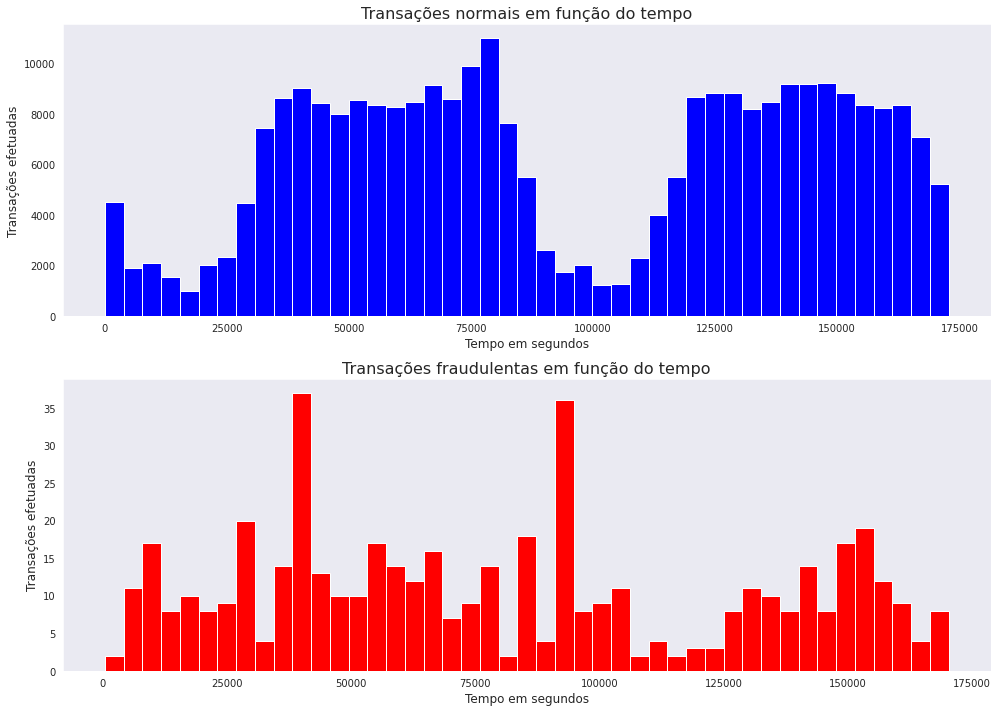

In [25]:
# Variável Time em relação às transações bancárias reais e as fraudulentas

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,10))

num_bins = 45

ax1.hist(df['Time'][df['Class'] == 0], bins=num_bins, color='b')
ax1.set_title('Transações normais em função do tempo', fontsize=16)
ax1.set_xlabel('Tempo em segundos', fontsize=12)
ax1.set_ylabel('Transações efetuadas', fontsize=12)

ax2.hist(df['Time'][df['Class'] == 1], bins=num_bins, color='r')
ax2.set_title('Transações fraudulentas em função do tempo', fontsize=16)
ax2.set_xlabel('Tempo em segundos', fontsize=12)
ax2.set_ylabel('Transações efetuadas', fontsize=12)

plt.tight_layout()

> Pelos histogramas, não foi possível encontrar algo que diferencie o comportamento das transações normais e das fraudes em função do tempo.

Ainda na análise da variável `Class`, vamos examinar seu comportamento em função do valor monetário movimentado em cada transação (variável `Amount`) - para tal, plotaremos dois *boxplots*, um para as transações normais e outro para as fraudulentas. 

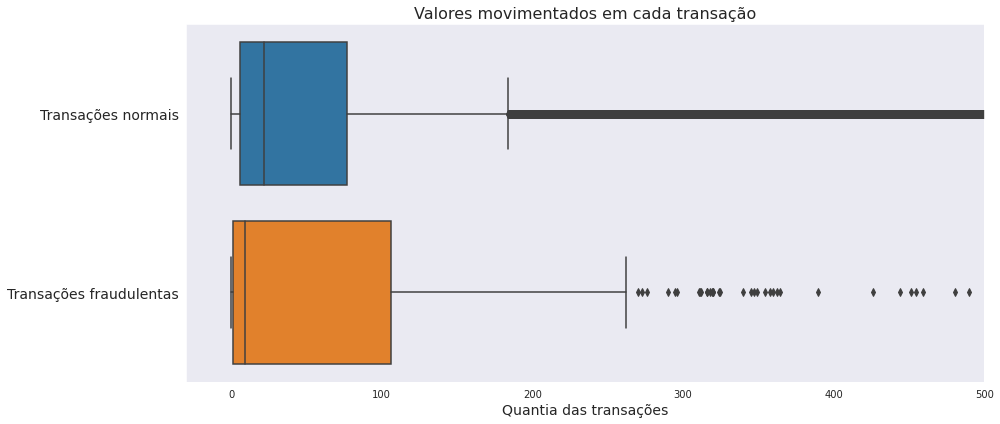

In [26]:
fig, ax = plt.subplots(figsize=(14,6))

sns.boxplot(df['Amount'], df['Class'], ax=ax, orient='h')
plt.xlim((-30, 500)) # Estabelecer um limite máximo de modo a eliminar parte dos outliers mais distantes e facilitar a visualização
ax.set_title('Valores movimentados em cada transação', fontsize=16)
ax.set_yticklabels(['Transações normais', 'Transações fraudulentas'], fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Quantia das transações', fontsize=14)

plt.tight_layout()

In [27]:
df[(df['Class'] == 1) & (df['Amount'] < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

> As transações bancárias do *dataset*, na maior parte dos casos, envolvem valores financeiros mais baixos; contudo, é possível notar que, proporcionalmente, a maior parte das transações fraudulentas chegam a atingir valores maiores daqueles alcançados pela maioria das transações normais. Essa diferença de comportamento contribuirá para que o modelo de *Machine Learning* tenha mais precisão para diferenciar os dois tipos de transação. 


Por fim, plotaremos uma série de gráficos de densidade, onde as duas classificações da variável `Class` (**0** para **transações normais** e **1** para **fraudes**), terão suas distribuições aplicadas em função das variáveis do *dataset* que passaram pelo procedimento PCA (`V1` até `V28`). O objetivo é detectar visualmente em quais situações as fraudes e as transações legítimas se comportam de maneira distinta, criando assim mais um importante parâmetro de diferenciação para alimentar o modelo de *Machine Learning*. 

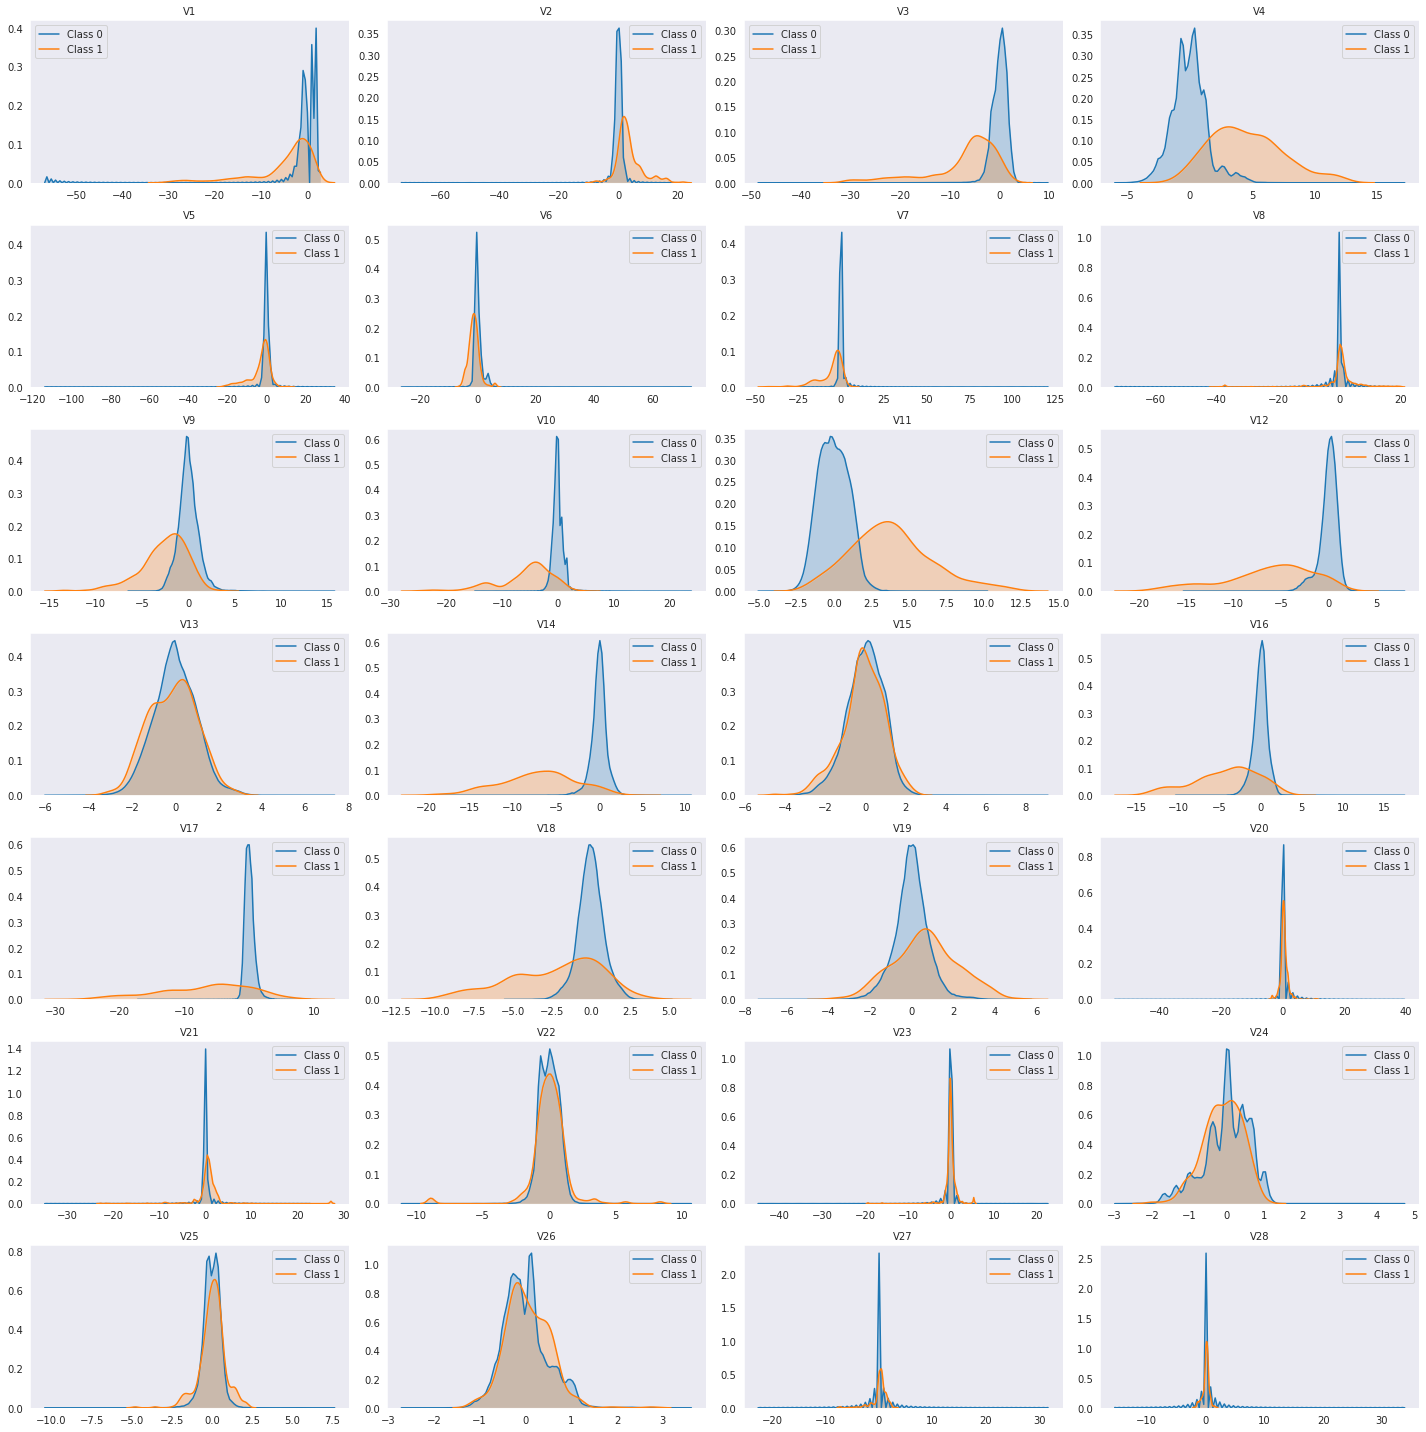

In [29]:
# Instanciar as colunas que estão em PCA

colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

# Instanciar o número de elementos a serem plotados correspondentes ao número de variáveis PCA 
num_plots = len(colunas)

# Instanciar separadamente as classes da variável-alvo
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class']== 1]

# Plotar os gráficos de densidade colocando as duas classes da variável-alvo em função das variáveis PCA
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(20,20))

idx = 0
for col in colunas:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label='Class 0', shade=True)
  sns.kdeplot(df_class_1[col], label='Class 1', shade=True)
  plt.title(col, fontsize=10)
plt.tight_layout()

> As transações normais e fraudulentas tem suas distribuições mais discrepantes quando associadas às variáveis `V3`, `V4`, `V9`, `V10`, `V11`, `V12`, `V14`, `V16` e `V17`. Essas discrepâncias mais expressivas facilitam a detecção de fraudes em meio ao total de transações bancárias. 

## 4.8 - Conclusões sobre a análise exploratória do *dataset*

* Não há valores ausentes;
* Não há correlação expressiva entre as variáveis;
* Antes do desenvolvimento do algoritmo **é necessário balancear os dados da base**, uma vez que as fraudes correspondem a apenas 0,17% do total das entradas na variável-alvo `Class`;
* Em geral, as transações envolvem valores baixos. Contudo, em proporção, a maioria dos valores das fraudes alcançam valores mais elevados do que a maioria das transações legítimas; 
* Quando analisadas sob cada variável PCA (`V1` a `V28`) a distribuição das fraudes e transações legítimas demostraram, em diversos casos, comportamentos distintos - informação crucial para que o algoritmo tenha melhores condições de classificar corretamente as transações. 

---
---

# **5 - Preparação dos dados para *Machine Learning***
Antes de iniciarmos a construção do modelo de *Machine Learning* é fundamental realizar a preparação dos dados. No caso desse projeto isso se dará por meio das três seguintes etapas: 

#### 1) Normalização das variáveis `Time` e `Amount`
#### 2) Divisão do conjunto de dados entre treino e teste
#### 3) Balanceamento dos dados


## 5.1 - Normalização das variáveis `Time` e `Amount`

Normalização dos dados é um importante procedimento para alcançarmos melhores resultados em nossos algoritmos. A ideia é colocar diferentes variavéis numéricas na mesma ordem de grandeza, sem com que cada uma delas perca a diferença dentro do alcance de seus respectivos valores. 
Em outras palavras, colocaremos as variáveis `Time` e `Amount` sob a mesma balança. 

**O objetivo é evitar que uma variável, cuja grandeza seja maior que a outra, exerça influência vastamente superior nos resultados do modelo preditivo.** 

Para realização desse procedimento, utilizaremos a função `StandardScaler`, que colocará as duas variáveis em questão na mesma ordem de grandeza. Após o procedimento, levantaremos as 5 primeiras entradas do *dataset* para verificarmos se as variáveis foram normalizadas. 

In [30]:
# Realizar uma cópia do DataFrame
df_clean = df.copy()

# Instanciar o StandardScaler
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

df_clean.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## 5.2 - Divisão do conjunto de dados entre treino e teste

A boa performance do modelo de *machine learning* depende de uma boa divisão do conjunto de dados entre treino (*training*) e teste (*test*)

<img src="https://www.researchgate.net/profile/Brian_Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png" width="50%"/>

[Fonte da imagem](https://www.researchgate.net/figure/Train-Test-Data-Split_fig6_325870973)


Conjunto de **treino (*Training*)**: 
abrange a maior parte do conjunto de dados, que serão utilizados para treinar o modelo de *machine learning*.

Conjunto de **teste (*Test*)**:
menor fração do conjunto de dados, que servirá para testar a eficiência da capacidade preditiva do modelo de *machine learning* quando esse já estiver sido treinado. 

In [51]:
# Separar as variáveis independentes (X) e dependente (y)
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividir os conjuntos de dados de treino e test 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True) 


Considerando que a **y** representa a variável `Class` e que essa última possui uma grande desproporcionalidade em suas entradas (onde somente 0,17% representam as transações bancárias fraudulentas) utilizaremos o parâmetro *stratify*: que permitirá que os conjuntos de teste e treino de **y** recebam, proporcionalmente, todas as suas possíveis entradas.  

## 5.3 - Balanceamento dos dados

Conforme levantado na análise exploratória, há um expressivo desbalanceamento dos dados da base aqui estudada - algo evidente na variável `Class`: onde resultados podem variar entre **0** para **transações normais** e **1** para **transações fraudulentas**, sendo que essa última representa somente **0,17% do total de transações bancárias**. 

Nesse cenário, se optássemos em rodar o algoritmo sem antes balancear os dados do *dataset*, ele teria um bom resultado somente para a **classe 0**, por essa ter a maioria praticamente absoluta do total de entradas. Porém, como nosso objetivo é criar um modelo de *machine learning* para identificar fraudes, é essencial que a **classe 1** esteja proporcionalmente presente no conjunto de treino.

Para isso, utilizaremos a técnica de ***undersampling*** - que proporciona o balanceamento dos dados por meio da **eliminação aleatória de entradas da classe majoritária**, até que a mesma esteja **proporcional à minoritária**. 

<img src="https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png" width="90%"/>

[Fonte da imagem](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t1) 




In [52]:
# Instanciando o Random UnderSampler
rus = RandomUnderSampler()

# Instanciando as variáveis de treino na sua versão balanceada
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Após a aplicação da técnica, vamos plotar um gráfico para conferir se os dados estão balanceados.

In [53]:
print(pd.Series(y_rus).value_counts())

1    369
0    369
dtype: int64


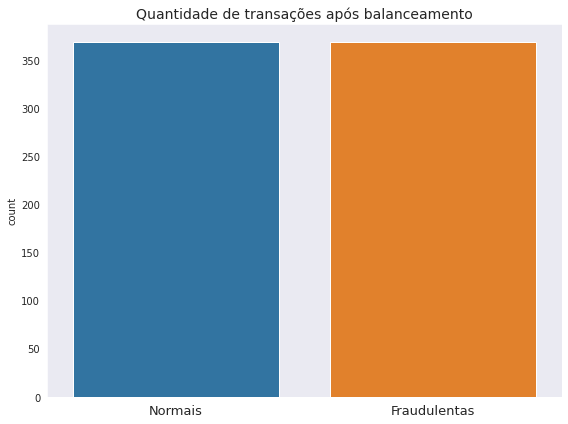

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(y_rus, ax=ax)
ax.set_title('Quantidade de transações após balanceamento', fontsize=14)
ax.set_xticklabels(['Normais' , 'Fraudulentas'], fontsize=13)
plt.tight_layout()

> Percebe-se que os dados tornaram-se balanceados e as classes passaram a ter um número equilibrado de entradas.



Para demonstrar a eficiência do balanceamento dos dados, plotaremos duas matrizes de correlação: uma com os dados ainda desbalanceados e outra com os dados balanceados.

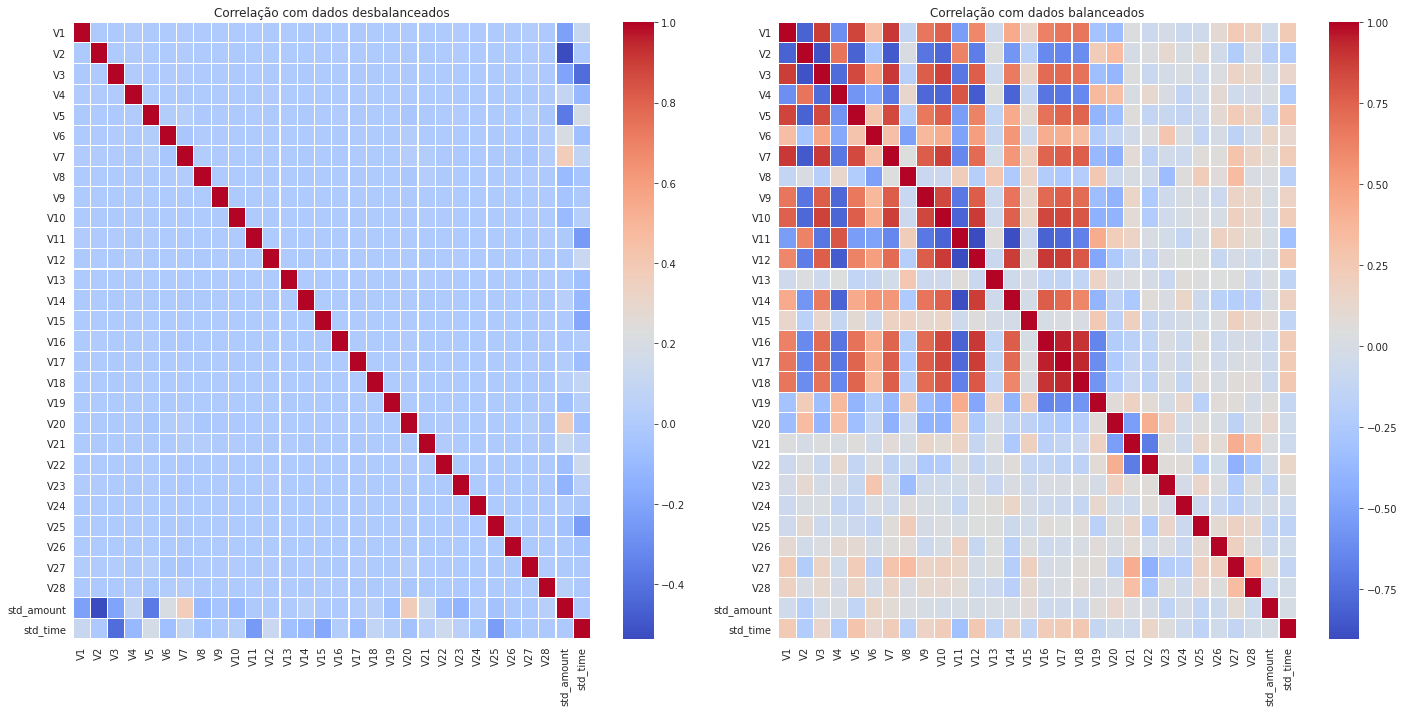

In [55]:
corr_des = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.heatmap(corr_des, ax=ax[0], xticklabels=corr_des.columns, yticklabels=corr_des.columns, cmap='coolwarm', linewidths=.1)
ax[0].set_title('Correlação com dados desbalanceados')

sns.heatmap(corr_rus, ax=ax[1], xticklabels=corr_des.columns, yticklabels=corr_des.columns, cmap='coolwarm', linewidths=.1)
ax[1].set_title('Correlação com dados balanceados')

plt.tight_layout();


> Na matriz com os dados desbalanceados, não há presença de correlações expressivas, devido uma quase hegemonia das entradas da classe majoritária. Já na correlação com os dados balanceados, essa hegemonia foi descartada e as classses foram devimente equilibradas, o que possibilitou correlações muito mais expressivas.

---
---


#**6 - Construção do modelo de *Machine Learning* para detecção de fraudes**

Com os dados devidamente balanceados e os conjuntos de teste e treino preparados, vamos iniciar o processo de montagem do modelo de *Machine Learning*. 



Como estamos lidando com um **problema de classificação** onde devemos apontar **se há ou não fraude** nas transações bancárias, utilizaremos 2 modelos de *machine learning* adequados para classificar algo dentro de um conjunto de categorias. São eles: 

1) **Regressão logística** 

2) **Árvore de decisão** (*Decision Tree*)

Em seguida, avaliaremos o desempenho de cada modelo e faremos as devidas comparações para definir qual dos dois apresentou mais eficiência na detecção de fraudes bancárias.

## 6.1 - Modelo 1: Regressão logística

Regressão logística é um algoritmo de *machine learning* adequado para tratar problemas de classificação, como no caso desse projeto: onde buscamos classificar com eficiência quais transações bancárias são legítimas e quais são fraudulentas. 

Para tal, o algoritmo realiza sua análise preditiva com base no cálculo do nível de probabilidade de uma entrada pertencer a uma determinada classe dentro da variável-alvo.

<img src="https://aigeekprogrammer.com/wp-content/uploads/2019/10/Logistic-Regression-for-binary-classification.jpg" width=70% />

[Fonte da imagem](https://aigeekprogrammer.com/wp-content/uploads/2019/10/Logistic-Regression-for-binary-classification.jpg)

Desta maneira, instanciaremos um modelo de regressão logística como `model_lr` para que os conjuntos previamente balanceados, `X_rus` e `y_rus`, sejam treinados. 

In [56]:
# Instanciando o modelo e hyperparametros
model_lr = LogisticRegression() 

# Aplicar os dados de treino já balanceados no modelo de Regressão Logística
model_lr.fit(X_rus, y_rus)

# Realizar previsões 
y_pred = model_lr.predict(X_test)
y_proba = model_lr.predict_proba(X_test)

Em seguida, realizaremos as previsões em cima dos dados de teste e exibiremos os indicadores de perfomance do **modelo de Regressão Logística** por meio do relatório de classificação e matriz de confusão (*Confusion matrix*) 

In [57]:
# Imprimir o relatório de classificação 
print(classification_report(y_test, y_pred, digits=4))

# Imprimir acurácia do modelo regressão logística
print('Accuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# Imprimir a área sob a curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0     0.9998    0.9589    0.9790     71079
           1     0.0370    0.9106    0.0710       123

    accuracy                         0.9589     71202
   macro avg     0.5184    0.9348    0.5250     71202
weighted avg     0.9982    0.9589    0.9774     71202

Accuracy: 0.9589

AUC: 0.9348



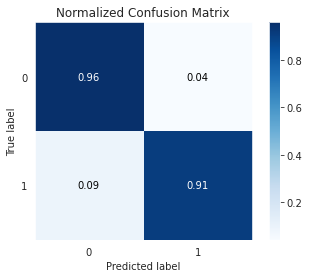

In [58]:
# Plotar a matriz de confusão 

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

## 6.1.1 Regressão logística: avaliação do desempenho

<p>&nbsp</p>

#### **Definindo o que é positivo e negativo**

Para facilitar nossa análise, vamos associar como **positivo**, quando uma transação for classificada como **fraude**. Em contrapartida, **negativo** quando uma transação for normal, em outras palavras: **não é fraude**.

<p>&nbsp</p>

#### **Matriz de confusão aplicada ao modelo**

A matriz de confusão é um resumo da performance do modelo, onde temos:

* *Verdadeiros negativos*: As transações que o modelo classificou como não-fraude e as mesmas de fato não eram **(previsão correta)**;

* *Falsos negativos*: Transações que o modelo classificou como não-fraude, mas as mesmas eram fraudes **(previsão incorreta)**;

* *Verdadeiros positivos*: Transações que o modelo classificou como fraude e as mesmas de fato eram fraudes **(previsão correta)**;

* *Falsos positivos*: Transações que o modelo classificou como fraude, mas eram na realidade, não-fraude **(previsão incorreta)**;

<p>&nbsp</p>

#### **Acurácia alta não garante a eficiência desse modelo**
Acurácia (*accuracy*) é um indicador geral de perfomance do algoritmo: calculado com todos os acertos (verdadeiros positivos e verdadeiros negativos) do modelo sobre o total de transações bancárias.

Se analisarmos somente a acurácia, temos um **valor de 0,958**, o que indica que o modelo é eficiente para prever a maioria dos resultados. Contudo, considerando que as fraudes correspondem a somente 0,17% das transações bancárias, ainda não sabemos se o modelo é de fato eficiente para detectar fraudes.

<p>&nbsp</p>

#### **A importância da precisão e recall**

Para isso, teremos que dar destaque aos demais indicadores do relatório de classificação:

**Precisão (*precision*)** é calculada com o total de verdadeiros positivos sobre a soma dos verdadeiros positivos e falsos positivos. 
Ou seja, um indicador de precisão cada vez mais próximo ao valor máximo (1), significa que o modelo gerou poucos falsos positivos.



> No modelo, a precisão para detectar que as transações não são fraudulentas, é alta (0,9998 para a classe "0"). Ou seja, tem o potencial de minimizar o bloqueio de transações legítimas, erroneamente classificadas como fraude.



**Recall**, por sua vez, é calculado com o total de verdadeiros positivos sobre a soma dos verdadeiros positivos e os falsos negativos.  Ou seja, um *recall* de valor elevado mostra que o modelo gerou poucos falsos negativos. 



> No modelo, o recall alto (0,9106 para classe "1") demonstra a eficiência em minimizar as ocorrências onde uma fraude possa, por engano, ser considerada uma transação legítima.  


## 6.2 - Árvore de decisão (*decision tree*) 

Árvore de decisão é um algoritmo supervisionado de *Machine Learning* que é capaz auxiliar na solução de problemas de regressão ou, como no caso desse projeto, classificação. 

Simulando a estrutura de uma árvore, o ponto de partida do algoritmo é a raiz (*root*) que contém os dados a serem classificados. O modelo utiliza de um atributo para separar, em subconjuntos, os dados entre uma classe e outra; nesse caso, quais dados tem a maior probabilidade de serem transações fradulentas e quais são transações legítimas.


<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/09/Untitled-design-10.png" width="80%" />

[Fonte da imagem](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/09/Untitled-design-10.png")


Se assim programado, o algoritmo pode utilizar mais um atributo para analisar os dois subconjuntos, dividindo-os em novos subconjuntos de classificação mais puros. Cada nível de divisão e classificação dos dados é considerado uma nova profundidade (*depth*). 

Um ponto importante da árvore de decisão é o cuidado ao estipular um nível muito alto de profundidade, o que pode levar a uma segmentação excessiva na classificação dos dados, tornando o modelo de *machine learning* enviesado (*overfitting*)

Vamos iniciar o processo instanciando um modelo de árvore de decisão como `model_tree` para que os conjuntos previamente balanceados, `X_rus` e `y_rus`, sejam treinados.  


In [102]:
# Instanciando o modelo e hyperparametros
model_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, min_samples_split=5, max_depth=6)
model_tree.fit(X_rus, y_rus)

# Realizar previsões 
y_predtree = model_tree.predict(X_test)
y_probatree = model_tree.predict_proba(X_test)

Em seguida, vamos plotar a visualização da árvore da decisão para demonstrar como os dados de treino foram particionados.

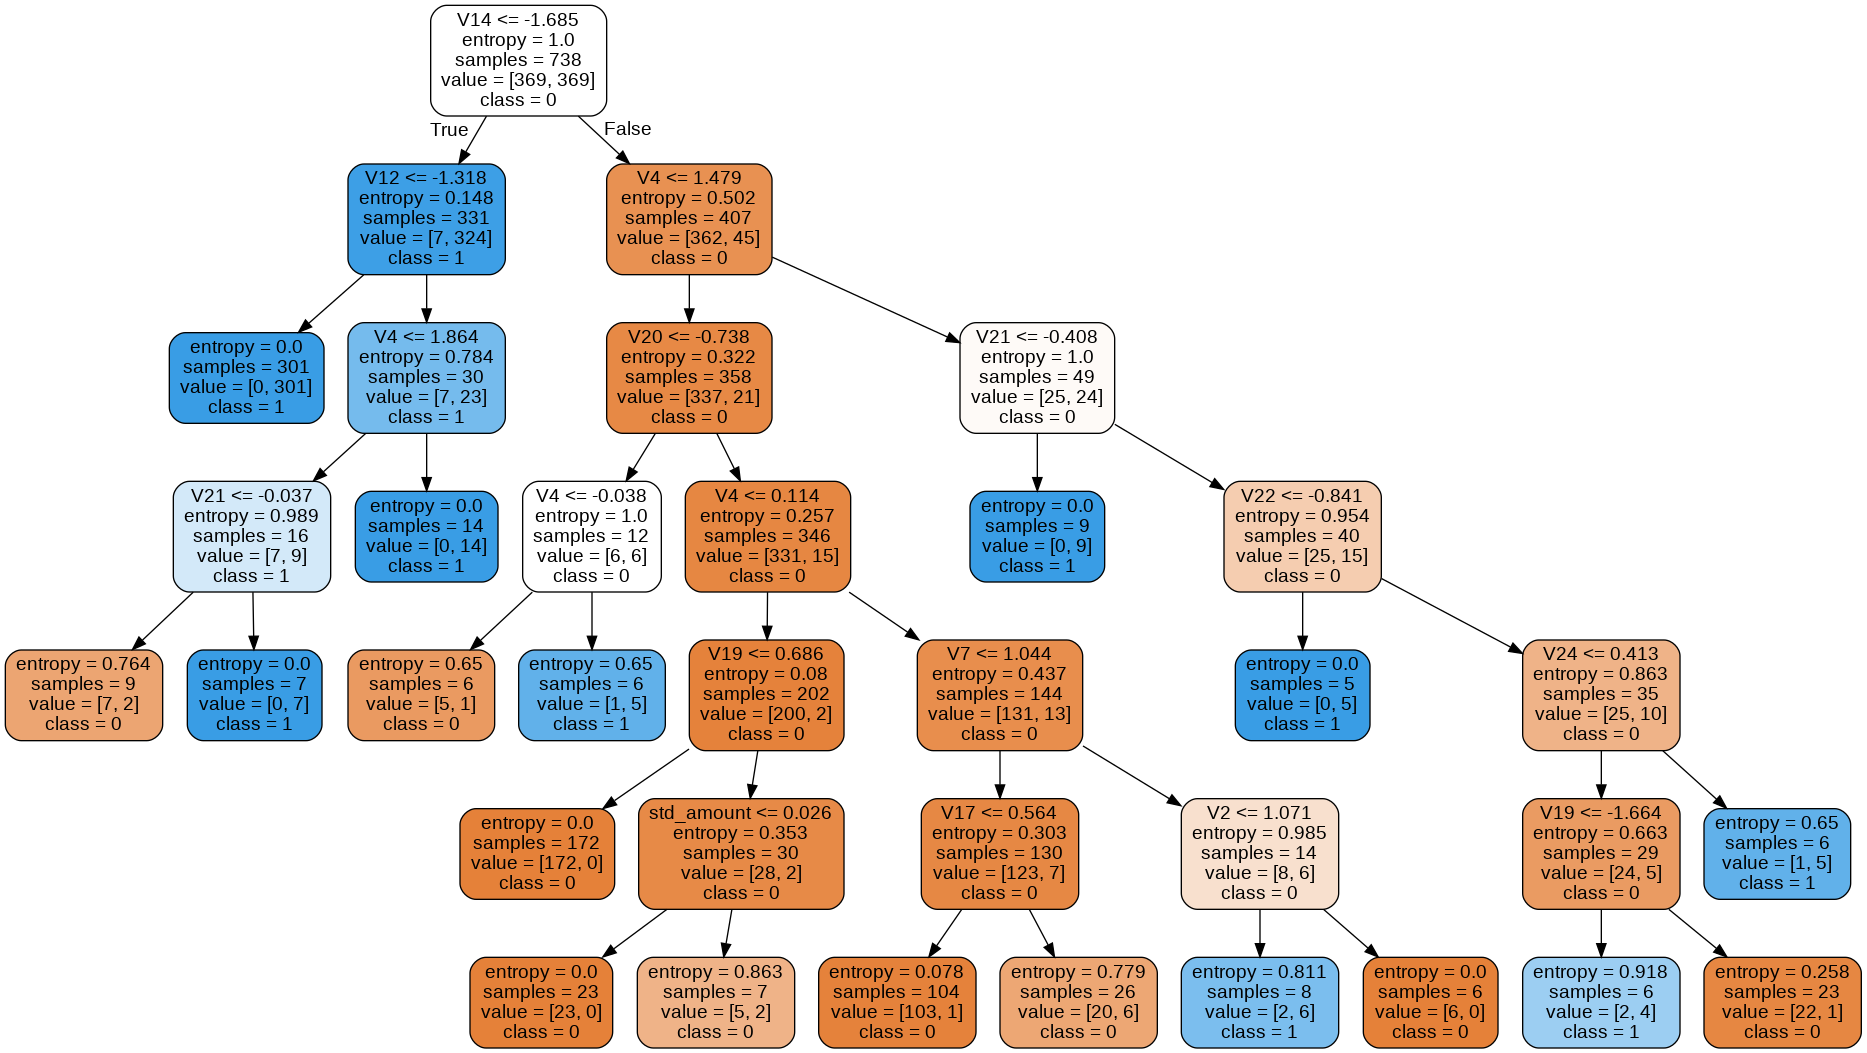

In [103]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
 
dot = export_graphviz(model_tree, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

Assim como realizado na Regressão Logística, faremos as previsões em cima dos dados de teste e exibiremos os indicadores de perfomance do **modelo de Árvore de Decisão** por meio do relatório de classificação e matriz de confusão (*Confusion matrix*) 

In [104]:
# Imprimir o relatório de classificação 
print(classification_report(y_test, y_predtree, digits=4))

# Imprimir acurácia do modelo regressão logística
print('Accuracy: {:.4f}\n'.format(accuracy_score(y_test, y_predtree)))

# Imprimir a área sob a curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_predtree)))

              precision    recall  f1-score   support

           0     0.9999    0.9183    0.9574     71079
           1     0.0194    0.9350    0.0381       123

    accuracy                         0.9183     71202
   macro avg     0.5096    0.9266    0.4977     71202
weighted avg     0.9982    0.9183    0.9558     71202

Accuracy: 0.9183

AUC: 0.9266



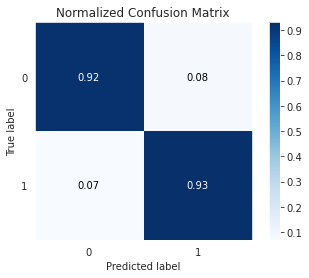

In [105]:
# Plotar a matriz de confusão 

skplt.metrics.plot_confusion_matrix(y_test, y_predtree, normalize=True);

## 6.2.1 - Árvore de decisão (*decision tree*): avaliação do desempenho



> A árvore de decisão apresentou uma acurácia de: **0,9183**, consideravelmente menor que a da Regressão Logística: **0,9589**



> A precisão para identificação de transações legítimas foi tão alta quanto a da regressão logística: **0,9999**



> Já o recall para classe 1 foi de **0,9350**, ou seja, maior que o mesmo indicador na regressão lógistica: **0,9106**

## 6.3 - Regressão logística **X** Árvore de decisão

#### Regressão logística
O modelo apresentou uma boa performance geral, com bons índices de precisão e recall, além de apresentar a maior acurácia entre os dois modelos.  

#### Árvore de decisão 
Para esse projeto, os parâmetros do modelo foram ajustados de modo a chegar a um melhor desempenho no *recall* da classe 1: que representa a capacidade de identificação de uma transação bancária fraudulenta; nesse aspecto, a árvore de decisão apresentou um desempenho de **0,9350**, ligeiramente superior ao da Regressão Logística de **0,9106**.


---
---

#**7 - Conclusões**

* A transformação PCA (utilizada por razões de confidencialidade) e a disparidade entre da grande quantidade de transações legítimas em relação à baixa ocorrência de fraudes, exigiram extensos ajustes ao *dataset*, por meio da normalização de variáveis e balanceamento dos dados;

* Se os ajustes acima não fossem realizados, o modelo seria treinado exclusivamente sob a classificação das entradas não-fraudulentas, o que resultaria em uma alta acurácia, porém com capacidade praticamente nula em detectar fraudes;

* O balanceamento de dados pela técnica de *undersampling* permitiu que os modelos de *machine learning* fossem treinados com um número equilibrado de transações legítimas e fraudes. Isso foi essencial para que os modelos apresentassem bons resultados na detecção de fraudes;

* Os dois modelos de *machine learning* utilizados demonstraram boa capacidade de identificar transações normais e também de minimizar o número de fraudes erroneamente classificadas como operações legítimas. Enquanto o modelo de regressão logística apresentou maior acurácia, o modelo de árvore de decisão apresentou uma performance levemente superior na detecção de fraudes. No final das contas, ambos os modelos mostraram-se eficientes e passíveis de ajustes para apresentarem melhores resultados. 

* Tratando-se da construção de um modelo de *machine learning* sempre há espaço para melhoria da performance sob a consequência de uma contrapartida. No caso específico da classificação de transações bancárias, tudo dependerá do que a instituição financeira deseja priorizar. Por exemplo: se a instituição financeira quer evitar ao máximo o transtorno dos clientes assegurando que nenhuma transação legítima seja erroneamente bloqueada, a contrapartida é que algumas fraudes poderão, potencialmente, ser classificadas como legítimas; ou se o foco for o bloqueio de praticamente todas as operações fraudulentas, a contrapartida é o potencial bloqueio equivocado de algumas transações legítimas.

